# Word Embeddings
## 오태건(20224071)

In [1]:
import gensim.downloader as api

In [2]:
# Glove - Stanford University
# Word2Vec - Google
model = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [3]:
model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [4]:
model.vectors.shape

(400000, 50)

## Visualization of Embedding Vectors

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
vec = model['king'].reshape(1, -1)

In [8]:
vec.shape

(1, 50)

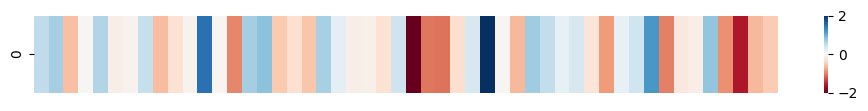

In [9]:
plt.figure(figsize=(12,1))
sns.heatmap(vec, cmap='RdBu', vmax=2, vmin=-2)
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.show()

In [10]:
def plot_embeddings(words):
    n_words = len(words)
    vectors = np.array([model [x] for x in words])

    print(vectors.shape)

    plt.figure(figsize=(12, n_words))
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2)

    ax = plt.gca()
    ax.set_yticklabels(words, rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=24)

    plt.tick_params(axis='x', bottom=False, labelbottom=False)
    plt.show()


(4, 50)


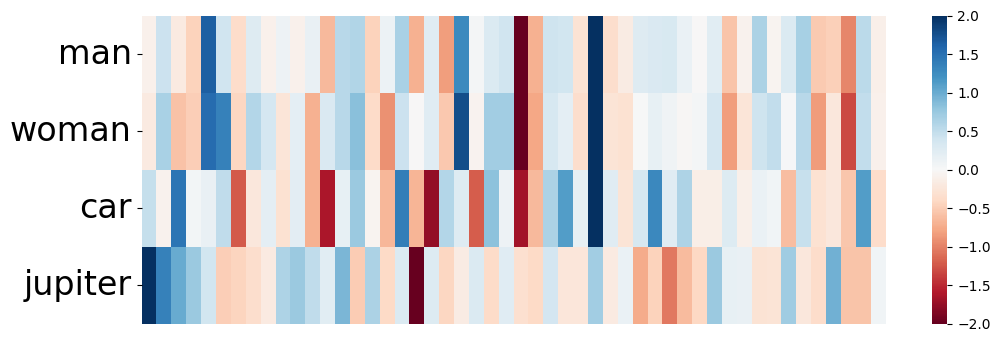

In [11]:
plot_embeddings(['man', 'woman', 'car', 'jupiter'])

## Similar Words

In [12]:
model.most_similar('dog')

[('cat', 0.9218004941940308),
 ('dogs', 0.8513158559799194),
 ('horse', 0.7907583713531494),
 ('puppy', 0.7754920721054077),
 ('pet', 0.7724708318710327),
 ('rabbit', 0.7720814347267151),
 ('pig', 0.7490062117576599),
 ('snake', 0.7399188876152039),
 ('baby', 0.7395570278167725),
 ('bite', 0.7387937307357788)]

### king-man+woman =?

In [13]:
model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

### gender bias?
 * doctor - man + womna = nurse
 * 결과가 doctor가 아닌게 이슈가 있었지만,
 * 함수 구현 자체가 인자로 받은 값은 제외하고 있었음

In [14]:
model.most_similar(positive=['doctor', 'woman'], negative=['man'])

[('nurse', 0.8404642939567566),
 ('child', 0.7663259506225586),
 ('pregnant', 0.7570130228996277),
 ('mother', 0.7517457604408264),
 ('patient', 0.7516663074493408),
 ('physician', 0.7507280707359314),
 ('dentist', 0.7360343933105469),
 ('therapist', 0.7342537045478821),
 ('parents', 0.7286345958709717),
 ('surgeon', 0.7165213227272034)]

In [17]:
vec = model['doctor'] - model['man'] + model['woman']
vec = vec.reshape(1, -1)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
cosine_similarity(vec, model['nurse'].reshape(1,-11))

array([[0.8424269]], dtype=float32)

In [20]:
cosine_similarity(vec, model['doctor'].reshape(1,-11))

array([[0.8959885]], dtype=float32)